In [652]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("immovlan_cleaned_file.csv", encoding="utf-8-sig")

# House-type 
house_types = [
    "Residence", "Villa", "Mixed Building", "Master House",
    "Cottage", "Bungalow", "Chalet", "Mansion"
]

df['type'] = df['type'].astype(str).str.strip().str.title()

# Sadece house-type kayıtlarını seç ve df1 olarak kaydet
df1 = df[df['type'].isin(house_types)].copy()

# Kontrol
print(f"House-type dataset created with {len(df1)} rows.")
print(df1['type'].value_counts())
df1.head(10)



House-type dataset created with 6088 rows.
type
Residence         5211
Villa              450
Mixed Building     196
Chalet              68
Master House        62
Cottage             50
Bungalow            45
Mansion              6
Name: count, dtype: int64


,url,Property ID,Price,State of the property,Availability,Number of bedrooms,Livable surface,Furnished,Attic,Garage,...,Surface terrace,Total land surface,Swimming pool,type,postal_code,city,Region,province,price_per_sqm,Price_per_sqm_land
2,https://immovlan.be/en/detail/residence/for-sa...,vbd46297,399000.0,NaN,NaN,2.0,129.0,NaN,NaN,1.0,...,NaN,NaN,NaN,Residence,1501,buizingen,Flanders,Flemish Brabant,3093.023256,NaN
6,https://immovlan.be/en/detail/residence/for-sa...,vbd11776,190000.0,NaN,NaN,5.0,142.0,0.0,1.0,1.0,...,NaN,320.0,NaN,Residence,6830,bouillon,Wallonia,Luxembourg,1338.028169,593.750000
9,https://immovlan.be/en/detail/residence/for-sa...,rbu64988,327850.0,To be renovated,On contract,3.0,185.0,0.0,1.0,1.0,...,21.0,683.0,0.0,Residence,9810,nazareth,Flanders,East Flanders,1772.162162,480.014641
14,https://immovlan.be/en/detail/residence/for-sa...,vbc54869,365000.0,New,NaN,3.0,203.0,0.0,1.0,1.0,...,NaN,298.0,NaN,Residence,5001,belgrade,Wallonia,Namur,1798.029557,1224.832215
18,https://immovlan.be/en/detail/residence/for-sa...,rbu61502,460000.0,NaN,NaN,4.0,178.0,NaN,NaN,NaN,...,NaN,NaN,NaN,Residence,9420,erpe-mere,Flanders,East Flanders,2584.269663,NaN
19,https://immovlan.be/en/detail/residence/for-sa...,vbd11793,145000.0,To be renovated,Immediately,3.0,270.0,0.0,1.0,NaN,...,NaN,NaN,NaN,Residence,6830,bouillon,Wallonia,Luxembourg,537.037037,NaN
20,https://immovlan.be/en/detail/residence/for-sa...,rbu66306,125000.0,To be renovated,On contract,1.0,80.0,0.0,0.0,NaN,...,NaN,168.0,0.0,Residence,9450,denderhoutem,Flanders,East Flanders,1562.500000,744.047619
22,https://immovlan.be/en/detail/residence/for-sa...,vbd16229,310000.0,To be renovated,NaN,3.0,146.0,0.0,1.0,1.0,...,NaN,267.0,NaN,Residence,6700,arlon,Wallonia,Luxembourg,2123.287671,1161.048689
28,https://immovlan.be/en/detail/residence/for-sa...,rbu65967,449000.0,NaN,On contract,3.0,359.0,NaN,NaN,1.0,...,NaN,6932.0,NaN,Residence,3530,houthalen-helchteren,Flanders,Limburg,1250.696379,64.772072
30,https://immovlan.be/en/detail/villa/for-sale/6...,vbd38998,797000.0,Excellent,On contract,5.0,350.0,0.0,NaN,1.0,...,130.0,6145.0,1.0,Villa,6470,sivry-rance,Wallonia,Hainaut,2277.142857,129.698942


In [653]:
df1.shape

(6088, 33)

In [654]:
df1.columns

Index(['url', 'Property ID', 'Price', 'State of the property', 'Availability',
       'Number of bedrooms', 'Livable surface', 'Furnished', 'Attic', 'Garage',
       'Number of garages', 'Kitchen equipment', 'Kitchen type',
       'Number of bathrooms', 'Number of showers', 'Number of toilets',
       'Type of heating', 'Type of glazing', 'Elevator', 'Number of facades',
       'Garden', 'Surface garden', 'Terrace', 'Surface terrace',
       'Total land surface', 'Swimming pool', 'type', 'postal_code', 'city',
       'Region', 'province', 'price_per_sqm', 'Price_per_sqm_land'],
      dtype='object')

In [655]:
df2=df1.drop(['url','Availability','Attic','Kitchen equipment','Kitchen type','Furnished'],axis="columns")
df2.head()



,Property ID,Price,State of the property,Number of bedrooms,Livable surface,Garage,Number of garages,Number of bathrooms,Number of showers,Number of toilets,...,Surface terrace,Total land surface,Swimming pool,type,postal_code,city,Region,province,price_per_sqm,Price_per_sqm_land
2,vbd46297,399000.0,NaN,2.0,129.0,1.0,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,Residence,1501,buizingen,Flanders,Flemish Brabant,3093.023256,NaN
6,vbd11776,190000.0,NaN,5.0,142.0,1.0,1.0,NaN,1.0,3.0,...,NaN,320.0,NaN,Residence,6830,bouillon,Wallonia,Luxembourg,1338.028169,593.750000
9,rbu64988,327850.0,To be renovated,3.0,185.0,1.0,1.0,1.0,1.0,2.0,...,21.0,683.0,0.0,Residence,9810,nazareth,Flanders,East Flanders,1772.162162,480.014641
14,vbc54869,365000.0,New,3.0,203.0,1.0,1.0,NaN,1.0,2.0,...,NaN,298.0,NaN,Residence,5001,belgrade,Wallonia,Namur,1798.029557,1224.832215
18,rbu61502,460000.0,NaN,4.0,178.0,NaN,NaN,1.0,NaN,2.0,...,NaN,NaN,NaN,Residence,9420,erpe-mere,Flanders,East Flanders,2584.269663,NaN


In [656]:
df2.shape

(6088, 27)

In [657]:
df2.isnull().sum()

Property ID                 0
Price                     136
State of the property    1445
Number of bedrooms         63
Livable surface           369
Garage                   2501
Number of garages        3622
Number of bathrooms       611
Number of showers        4439
Number of toilets        1840
Type of heating          1643
Type of glazing          3148
Elevator                 1895
Number of facades         986
Garden                    204
Surface garden           4010
Terrace                   390
Surface terrace          4180
Total land surface        939
Swimming pool            4334
type                        0
postal_code                 0
city                        0
Region                      0
province                    0
price_per_sqm             494
Price_per_sqm_land       1053
dtype: int64

In [658]:
import numpy as np

# "nan" olan stringleri gerçek NaN'e çevir
df2["Price"] = df2["Price"].replace("nan", np.nan)

In [659]:
df3=df2.dropna(subset=["Price"])

In [660]:
df3.shape

(5952, 27)

In [661]:
df3.dtypes

Property ID               object
Price                    float64
State of the property     object
Number of bedrooms       float64
Livable surface          float64
Garage                   float64
Number of garages        float64
Number of bathrooms      float64
Number of showers        float64
Number of toilets        float64
Type of heating           object
Type of glazing           object
Elevator                 float64
Number of facades        float64
Garden                   float64
Surface garden           float64
Terrace                  float64
Surface terrace          float64
Total land surface       float64
Swimming pool            float64
type                      object
postal_code                int64
city                      object
Region                    object
province                  object
price_per_sqm            float64
Price_per_sqm_land       float64
dtype: object

In [662]:
df3.isnull().sum()

Property ID                 0
Price                       0
State of the property    1410
Number of bedrooms         53
Livable surface           358
Garage                   2450
Number of garages        3543
Number of bathrooms       582
Number of showers        4326
Number of toilets        1772
Type of heating          1584
Type of glazing          3089
Elevator                 1845
Number of facades         943
Garden                    193
Surface garden           3935
Terrace                   365
Surface terrace          4079
Total land surface        917
Swimming pool            4239
type                        0
postal_code                 0
city                        0
Region                      0
province                    0
price_per_sqm             358
Price_per_sqm_land        917
dtype: int64

##Numerical coloumns filled with median less effected by outliers

In [663]:
df4 = df3.copy()


num_cols = [
    "Number of bedrooms","Livable surface","Number of bathrooms","Number of toilets",
    "Number of facades","Surface garden","Surface terrace","Total land surface",
    "Number of garages","Number of showers"
]

for col in num_cols:
    df4[col] = pd.to_numeric(df4[col], errors="coerce")
    df4[col] = df4[col].fillna(df4[col].median())


In [664]:
df4[num_cols].isna().sum()

Number of bedrooms     0
Livable surface        0
Number of bathrooms    0
Number of toilets      0
Number of facades      0
Surface garden         0
Surface terrace        0
Total land surface     0
Number of garages      0
Number of showers      0
dtype: int64

In [665]:
df4[num_cols].describe()

,Number of bedrooms,Livable surface,Number of bathrooms,Number of toilets,Number of facades,Surface garden,Surface terrace,Total land surface,Number of garages,Number of showers
count,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000
mean,3.497984,199.270833,1.394489,2.048219,3.054940,578.571909,28.186660,1010.627688,1.459845,1.343414
std,1.519933,119.818759,1.134372,1.152697,0.747261,3628.382162,68.288914,3306.200992,25.130900,9.666894
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000
25%,3.000000,141.000000,1.000000,2.000000,2.000000,330.000000,24.000000,285.000000,1.000000,1.000000
50%,3.000000,174.000000,1.000000,2.000000,3.000000,330.000000,24.000000,494.000000,1.000000,1.000000
75%,4.000000,219.000000,2.000000,2.000000,4.000000,330.000000,24.000000,866.250000,1.000000,1.000000
max,50.000000,2350.000000,50.000000,50.000000,4.000000,200000.000000,2968.000000,101895.000000,1936.000000,482.000000


##Binary coloumn converted 0 and 1

In [666]:
df5 = df4.copy()
binary_cols = ["Garage", "Garden", "Terrace", "Elevator", "Swimming pool"]

for col in binary_cols:
    df5[col] = df5[col].fillna(0)
    df5[col] = df5[col].apply(lambda x: 1 if x != 0 else 0)
df5[binary_cols].head()


,Garage,Garden,Terrace,Elevator,Swimming pool
2,1,1,0,0,0
6,1,1,1,0,0
9,1,1,1,0,0
14,1,1,1,0,0
18,0,1,0,0,0


In [667]:

print(df5['Garage'].isna().sum())

# 2. check all binary col
binary_cols = ["Garage", "Garden", "Terrace", "Elevator", "Swimming pool"]
print(df5[binary_cols].isna().sum())

print(df5[df5['Garage'].isna()])


0
Garage           0
Garden           0
Terrace          0
Elevator         0
Swimming pool    0
dtype: int64
Empty DataFrame
Columns: [Property ID, Price, State of the property, Number of bedrooms, Livable surface, Garage, Number of garages, Number of bathrooms, Number of showers, Number of toilets, Type of heating, Type of glazing, Elevator, Number of facades, Garden, Surface garden, Terrace, Surface terrace, Total land surface, Swimming pool, type, postal_code, city, Region, province, price_per_sqm, Price_per_sqm_land]
Index: []

[0 rows x 27 columns]


##OUTLIERS REMOVAL

In [668]:
df5['Price'].describe()


count    5.952000e+03
mean     4.281538e+05
std      3.225572e+05
min      5.000000e+03
25%      2.650000e+05
50%      3.698880e+05
75%      4.947192e+05
max      8.600002e+06
Name: Price, dtype: float64

Items with outliers

OUTLIER REMOVAL - BOXPLOT BEFORE/AFTER

Before: 5952
After : 5940
Removed: 12


C:\Users\esram\AppData\Local\Temp\ipykernel_27064\2731807420.py:31: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



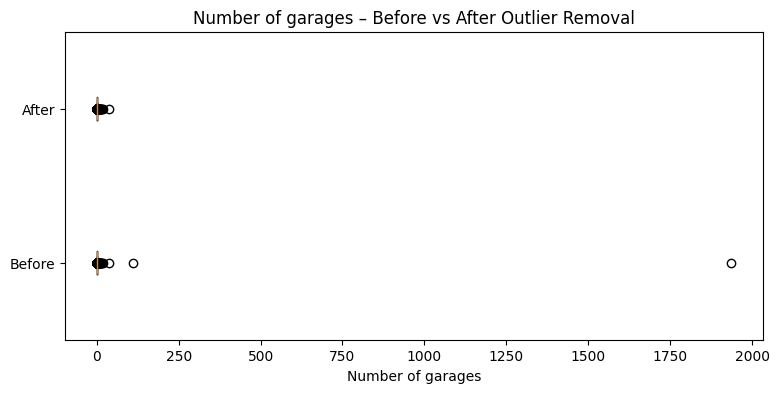

C:\Users\esram\AppData\Local\Temp\ipykernel_27064\2731807420.py:31: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



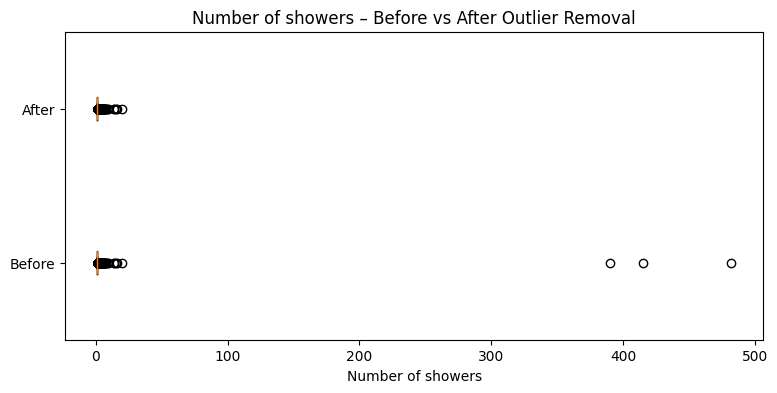

C:\Users\esram\AppData\Local\Temp\ipykernel_27064\2731807420.py:31: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



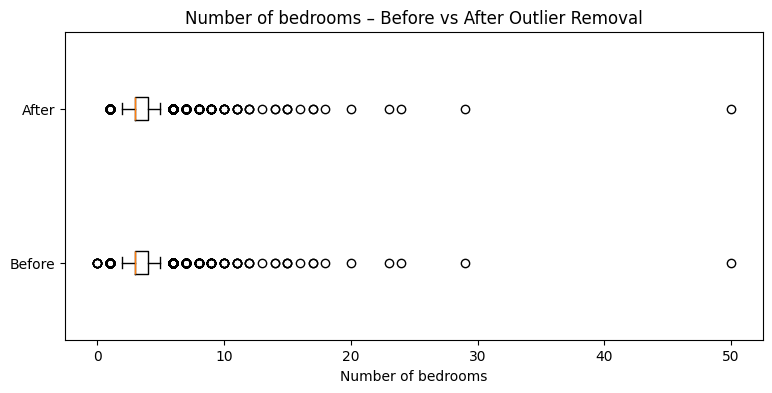

In [669]:


# ---- 1) Custom Outlier Thresholds ----

outlier_rules = {
    "Number of garages": {"min": 0, "max": 50},
    "Number of showers": {"min": 0, "max": 50},
    "Number of bedrooms": {"min": 1, "max": 50}
}
# ---- 2) BEFORE = df5 ----
df_before = df5.copy()

# ---- 3) Temizleme Fonksiyonu ----
def remove_outliers(df, rules):
    df_clean = df.copy()
    for col, limits in rules.items():
        if "min" in limits:
            df_clean = df_clean[df_clean[col] >= limits["min"]]
        if "max" in limits:
            df_clean = df_clean[df_clean[col] <= limits["max"]]
    return df_clean

# ---- 4) OUTLIER CLEANING → df6 ----
df6 = remove_outliers(df5, outlier_rules)

print("Before:", len(df5))
print("After :", len(df6))
print("Removed:", len(df5) - len(df6))

# ---- 5) BEFORE vs AFTER BOX PLOTS ----
for col in outlier_rules.keys():
    plt.figure(figsize=(9,4))
    plt.boxplot(
        [df_before[col], df6[col]],
        labels=["Before", "After"],
        vert=False
    )
    plt.title(f"{col} – Before vs After Outlier Removal")
    plt.xlabel(col)
    plt.show()


REMOVED OUTLIERS EXAMINATION

In [670]:
df7 = df6.copy()

In [671]:
df7.columns

Index(['Property ID', 'Price', 'State of the property', 'Number of bedrooms',
       'Livable surface', 'Garage', 'Number of garages', 'Number of bathrooms',
       'Number of showers', 'Number of toilets', 'Type of heating',
       'Type of glazing', 'Elevator', 'Number of facades', 'Garden',
       'Surface garden', 'Terrace', 'Surface terrace', 'Total land surface',
       'Swimming pool', 'type', 'postal_code', 'city', 'Region', 'province',
       'price_per_sqm', 'Price_per_sqm_land'],
      dtype='object')

In [672]:
# --- Extreme rules with min & max criteria ---
extreme_rules = {
    "Price": {"min": 50_000, "max": 1_000_000},             
    "Livable surface": {"min": 20, "max": 300},
    "Total land surface": {"min": 10, "max": 1200},
    "Number of bedrooms": {"min": 1, "max": 5},
    "Number of garages": {"min": 0, "max": 5},
    "Surface terrace": {"min": 0, "max": 150},
    "Surface garden": {"min": 0, "max": 600},
    "Number of bathrooms": {"min": 1, "max": 5}, 
    "Number of toilets": {"min": 1, "max": 5}, 
    "Number of showers": {"min": 1, "max": 5}
}

def is_extreme(row):
    for col, limits in extreme_rules.items():
        if col in row:
            if row[col] < limits["min"] or row[col] > limits["max"]:
                return True
    return False

# Apply to df7
df7["is_extreme"] = df7.apply(is_extreme, axis=1)

# Split datasets
df_extreme = df7[df7["is_extreme"] == True].copy()
df_model = df7[df7["is_extreme"] == False].copy()

print("Normal houses (df_model):", len(df_model))
print("Extreme houses (df_extreme):", len(df_extreme))


Normal houses (df_model): 4240
Extreme houses (df_extreme): 1700


In [673]:
df8 = df_model.copy() 

In [674]:
df8.shape

(4240, 28)

df7 BEFORE /df8 AFTER (removal of outliers based on 3 sigma rule)

In [675]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

numeric_cols = [
    "Price", "Number of bedrooms", "Livable surface", "Number of bathrooms",
    "Number of toilets", "Surface garden", 
    "Surface terrace", "Total land surface", "Number of garages",
    "Number of showers"
]

# --- Correct subplot titles ---
titles = []
for col in numeric_cols:
    titles.append(f"{col} – BEFORE (df7)")
    titles.append(f"{col} – AFTER (df8)")

# --- Create subplots ---
fig = make_subplots(
    rows=len(numeric_cols),
    cols=2,
    subplot_titles=titles,
    vertical_spacing=0.06
)

# --- Add traces row by row ---
for row_i, col in enumerate(numeric_cols, start=1):

    # BEFORE = df7
    fig.add_trace(
        go.Box(
            y=df7[col],
            name=f"{col} BEFORE",
            boxpoints="outliers"
        ),
        row=row_i, col=1
    )

    # AFTER = df8
    fig.add_trace(
        go.Box(
            y=df8[col],
            name=f"{col} AFTER",
            boxpoints="outliers"
        ),
        row=row_i, col=2
    )

fig.update_layout(
    height=350 * len(numeric_cols),
    width=1100,
    title="Outlier Removal — BEFORE (df7) vs AFTER (df8) — All Numeric Columns",
    showlegend=False
)

fig.show(renderer="vscode")


Avg price per province with mean

In [676]:
import plotly.express as px

# Calculate average house price per province
province_avg = df8.groupby("province", as_index=False)["Price"].mean()
province_avg = province_avg.sort_values("Price", ascending=False)

# Plot with bright colors
fig_province = px.bar(
    province_avg,
    x="province",
    y="Price",
    title="Average House Price by Province (mean)",
    labels={"Price": "Average Price (€)", "province": "Province"},
    color="Price",
    color_continuous_scale="Turbo",  # vibrant color scale
)

fig_province.update_layout(
    xaxis_tickangle=45,
    height=600,
    template="plotly_white",
    showlegend=False,
)

# THIS LINE MAKES IT WORK IN VS CODE
fig_province.show(renderer="vscode")


Avg price per province with median

In [677]:
import plotly.express as px

# Calculate median house price per province
province_median = df8.groupby("province", as_index=False)["Price"].median()
province_median = province_median.sort_values("Price", ascending=False)

# Plot with bright colors
fig_province = px.bar(
    province_median,
    x="province",
    y="Price",
    title="Median House Price by Province",
    labels={"Price": "Median Price (€)", "province": "Province"},
    color="Price",
    color_continuous_scale="Turbo",
)

fig_province.update_layout(
    xaxis_tickangle=45,
    height=600,
    template="plotly_white",
    showlegend=False,
)

fig_province.show(renderer="vscode")



In [679]:
df8.columns

Index(['Property ID', 'Price', 'State of the property', 'Number of bedrooms',
       'Livable surface', 'Garage', 'Number of garages', 'Number of bathrooms',
       'Number of showers', 'Number of toilets', 'Type of heating',
       'Type of glazing', 'Elevator', 'Number of facades', 'Garden',
       'Surface garden', 'Terrace', 'Surface terrace', 'Total land surface',
       'Swimming pool', 'type', 'postal_code', 'city', 'Region', 'province',
       'price_per_sqm', 'Price_per_sqm_land', 'is_extreme'],
      dtype='object')

In [680]:
df8.groupby("type")["type"].agg("count")

type
Bungalow            25
Chalet              36
Cottage             11
Mansion              1
Master House        24
Mixed Building     107
Residence         3891
Villa              145
Name: type, dtype: int64

In [681]:
columns_to_check = [
    'Number of bedrooms', 'Livable surface', 'Number of garages',
    'Number of bathrooms', 'Number of showers', 'Number of toilets',
    'Surface garden', 'Surface terrace'
]

for col in columns_to_check:
    print(f"\n--- {col} ---")
    print(df8[col].describe().apply(lambda x: format(x, ',.0f')))



--- Number of bedrooms ---
count    4,240
mean         3
std          1
min          1
25%          3
50%          3
75%          4
max          5
Name: Number of bedrooms, dtype: object

--- Livable surface ---
count    4,240
mean       165
std         46
min         34
25%        135
50%        165
75%        189
max        300
Name: Livable surface, dtype: object

--- Number of garages ---
count    4,240
mean         1
std          0
min          1
25%          1
50%          1
75%          1
max          5
Name: Number of garages, dtype: object

--- Number of bathrooms ---
count    4,240
mean         1
std          0
min          1
25%          1
50%          1
75%          1
max          5
Name: Number of bathrooms, dtype: object

--- Number of showers ---
count    4,240
mean         1
std          0
min          1
25%          1
50%          1
75%          1
max          5
Name: Number of showers, dtype: object

--- Number of toilets ---
count    4,240
mean         2
std        

In [682]:
# Create Price per m² column in your main DataFrame
df8['Price_per_m2'] = df8['Price'] / df8['Livable surface']

# Check the first few rows
df8[['Price', 'Livable surface', 'Price_per_m2']].head(20)


,Price,Livable surface,Price_per_m2
2,399000.0,129.0,3093.023256
6,190000.0,142.0,1338.028169
9,327850.0,185.0,1772.162162
14,365000.0,203.0,1798.029557
18,460000.0,178.0,2584.269663
19,145000.0,270.0,537.037037
20,125000.0,80.0,1562.500000
22,310000.0,146.0,2123.287671
34,521200.0,175.0,2978.285714
39,490000.0,150.0,3266.666667


Average Price per m² 

In [683]:
import plotly.express as px
import plotly.io as pio

# (Opsiyonel) Varsayılan renderer VS Code olsun
pio.renderers.default = "vscode"

# Calculate average Price_per_m2 per province
province_avg_m2 = df8.groupby("province", as_index=False)["Price_per_m2"].mean()
province_avg_m2 = province_avg_m2.sort_values("Price_per_m2", ascending=False)

# Plot with bright colors
fig_province_m2 = px.bar(
    province_avg_m2,
    x="province",
    y="Price_per_m2",
    title="Average Price per m² by Province",
    labels={"Price_per_m2": "Average Price per m² (€)", "province": "Province"},
    color="Price_per_m2",
    color_continuous_scale="Turbo",
)

fig_province_m2.update_layout(
    xaxis_tickangle=45,
    height=600,
    template="plotly_white",
    showlegend=False,
)

# Show inside VS Code
fig_province_m2.show(renderer="vscode")


##Group by postal code and city

In [684]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by both postal_code and city
house_by_region = (
    df8.groupby(['postal_code', 'city'])['Price']
    .agg(['count', 'mean', 'median', 'min', 'max'])
    .reset_index()
    .sort_values('mean', ascending=False)
)

print("Top 10 regions (postal_code + city) by average house price:")
print(house_by_region.head(10))


Top 10 regions (postal_code + city) by average house price:
     postal_code              city  count           mean    median       min  \
886         8510             marke      1  967000.000000  967000.0  967000.0   
857         8300      knokke-heist      6  845833.333333  895000.0  680000.0   
965         9070      destelbergen      9  752111.111111  775000.0  449000.0   
674         6730          tintigny      1  750000.000000  750000.0  750000.0   
30          1325  chaumont-gistoux      3  728333.333333  795000.0  495000.0   
4           1050            elsene      8  719375.000000  707500.0  525000.0   
18          1180             ukkel     15  714400.000000  750000.0  499000.0   
3           1040         etterbeek      3  713333.333333  775000.0  575000.0   
1           1020             laken      6  710500.000000  772500.0  499000.0   
123         1970   wezembeek-oppem      4  707250.000000  642500.0  549000.0   

          max  
886  967000.0  
857  950000.0  
965  812000

##impact of number of bedrooms on house price.

In [685]:
import plotly.express as px
import plotly.io as pio

# VS Code renderer (browser yerine)
pio.renderers.default = "vscode"

# Remove rows with missing Price or Number of Bedrooms
bedroom_df = df8.dropna(subset=["Price", "Number of bedrooms"])

# Convert Number of bedrooms to string for discrete coloring
bedroom_df["Number of bedrooms"] = bedroom_df["Number of bedrooms"].astype(int).astype(str)

# Calculate mean price per number of bedrooms for ordering
bedroom_order = (
    bedroom_df.groupby("Number of bedrooms")["Price"]
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)

# Box plot: Price distribution by Number of Bedrooms (sorted descending)
fig = px.box(
    bedroom_df,
    x="Number of bedrooms",
    y="Price",
    color="Number of bedrooms",
    title="Impact of Number of Bedrooms on House Price",
    labels={"Number of bedrooms": "Number of Bedrooms", "Price": "Price (€)"},
    points="all",
    category_orders={"Number of bedrooms": bedroom_order}
)

# Customize layout
fig.update_layout(
    xaxis=dict(type="category"),
    yaxis=dict(title="Price (€)"),
    showlegend=False,
    template="plotly_white",
    height=700,
    margin=dict(l=60, r=60, t=80, b=80)
)

# Show inside VS Code
fig.show(renderer="vscode")


##What is the correlation between the variables and the price

##group by the number of bedrooms and calculate the average house price per group

In [686]:
import plotly.express as px
import plotly.io as pio

# VS Code içinde grafik aç (browser yerine)
pio.renderers.default = "vscode"

# Remove rows with missing Price or Number of Bedrooms
bedroom_df = df8.dropna(subset=["Price", "Number of bedrooms"])

# Convert Number of bedrooms to string for discrete coloring
bedroom_df["Number of bedrooms"] = bedroom_df["Number of bedrooms"].astype(int).astype(str)

# Calculate average price per number of bedrooms
avg_price = bedroom_df.groupby("Number of bedrooms")["Price"].mean().reset_index()

# Sort ascending by average price
avg_price = avg_price.sort_values("Price", ascending=True)

# Bar chart: Number of bedrooms vs average price
fig = px.bar(
    avg_price,
    x="Number of bedrooms",
    y="Price",
    title="Average House Price by Number of Bedrooms (Ascending)",
    labels={"Number of bedrooms": "Number of Bedrooms", "Price": "Average Price (€)"},
    color="Price",
    color_continuous_scale="Turbo"
)

# Customize layout
fig.update_layout(
    xaxis_tickangle=0,
    yaxis=dict(title="Average Price (€)"),
    template="plotly_white",
    height=600,
    showlegend=False
)

fig.show()


##correlation between Number of Bedrooms and Price, and then show a scatter

In [687]:
import pandas as pd
import plotly.express as px

# Clean DataFrame
bedroom_df = df8.dropna(subset=["Price", "Number of bedrooms"]).copy()
bedroom_df.loc[:, "Number of bedrooms"] = pd.to_numeric(bedroom_df["Number of bedrooms"], errors="coerce")
bedroom_df.loc[:, "Price"] = pd.to_numeric(bedroom_df["Price"], errors="coerce")

# Calculate correlation
correlation = bedroom_df["Number of bedrooms"].corr(bedroom_df["Price"]) 
print(f"Correlation between Number of Bedrooms and Price: {correlation:.4f}")

# Scatter plot
fig = px.scatter(
    bedroom_df,
    x="Number of bedrooms",
    y="Price",
    title="House Price vs. Number of Bedrooms",
    labels={"Number of bedrooms": "Number of Bedrooms", "Price": "Price (€)"})


Correlation between Number of Bedrooms and Price: 0.3380


PPT GRAPH How does Livable surface correlate with price?



In [688]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# VS Code içinde grafik aç
pio.renderers.default = "vscode"

# Drop missing values and ensure numeric
surface_df = df8.dropna(subset=["Price", "Livable surface"]).copy()
surface_df["Price"] = pd.to_numeric(surface_df["Price"], errors="coerce")
surface_df["Livable surface"] = pd.to_numeric(surface_df["Livable surface"], errors="coerce")

# Calculate correlation
correlation = surface_df["Livable surface"].corr(surface_df["Price"])
print(f"Correlation between Livable Surface and Price: {correlation:.4f}")

# Scatter plot with trendline
fig = px.scatter(
    surface_df,
    x="Livable surface",
    y="Price",
    title="House Price vs Livable Surface",
    labels={"Livable surface": "Livable Surface (m²)", "Price": "Price (€)"},
    trendline="ols",
    color="Livable surface",
    hover_data=["city", "postal_code"]
)

fig.show()


Correlation between Livable Surface and Price: 0.4944


Correlation before outlier removal


Correlation with Price:
Price                  1.000000
Livable surface        0.563234
Number of bathrooms    0.418152
Number of toilets      0.401517
Number of bedrooms     0.373406
Swimming pool          0.312611
Total land surface     0.305336
Number of facades      0.247249
Number of showers      0.208547
Garage                 0.197583
Elevator               0.188758
Number of garages      0.178009
Terrace                0.157910
Surface garden         0.148566
Garden                 0.119927
Price_per_sqm_land     0.076763
Surface terrace        0.057792
price_per_sqm          0.015964
postal_code           -0.232946
Name: Price, dtype: float64


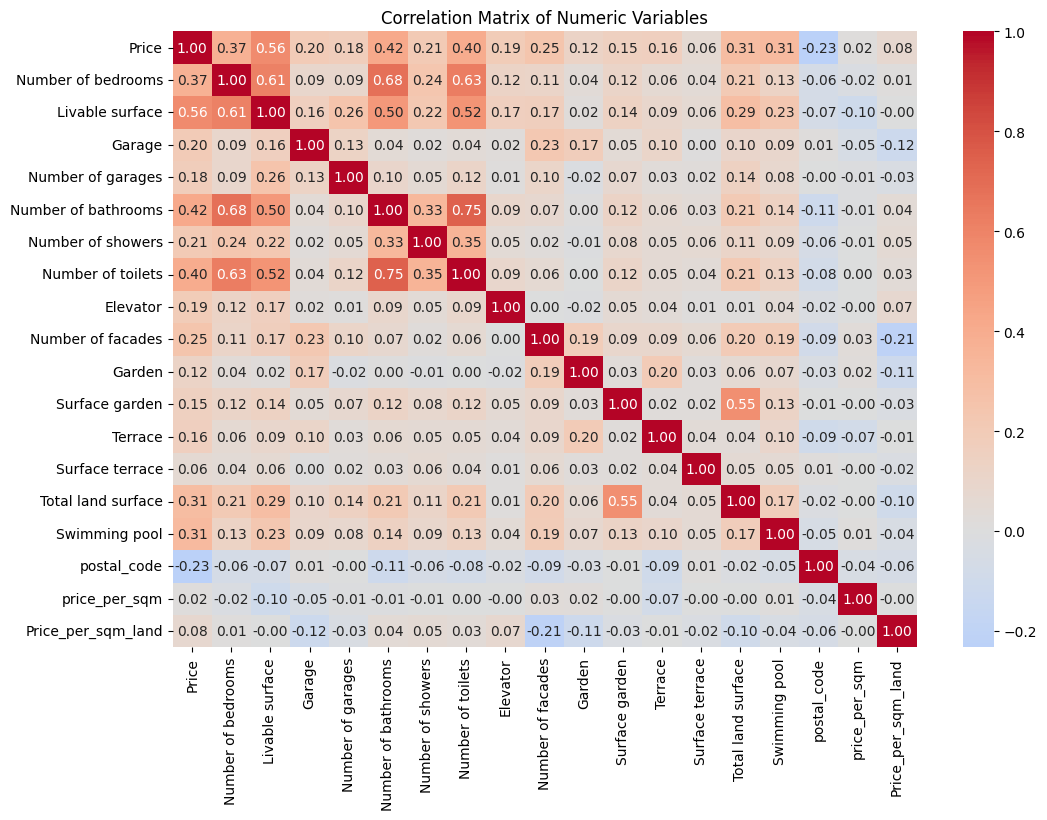

In [689]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df7.select_dtypes(include='number').columns

# Compute correlation matrix
corr_matrix = df7[numeric_cols].corr()

# Correlation of all variables with Price
price_corr = corr_matrix['Price'].sort_values(ascending=False)
print("Correlation with Price:")
print(price_corr)

# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Numeric Variables")
plt.show()



What is the correlation between the variables and the price? Why do you think some variables are more correlated than others?

Variables like livable Surface, Number of bedrooms, or Number of bathrooms are often more correlated with Price because bigger/larger houses naturally cost more.

Features like Garage, Swimming Pool might show moderate correlation if they are present mostly in expensive houses.

Correlation with Price:
Price                  1.000000
Price_per_m2           0.739773
price_per_sqm          0.718874
Livable surface        0.494399
Number of toilets      0.377059
Number of bedrooms     0.338050
Number of bathrooms    0.268844
Total land surface     0.232173
Price_per_sqm_land     0.225864
Garage                 0.207147
Number of facades      0.183694
Garden                 0.175047
Terrace                0.160304
Swimming pool          0.108825
Number of showers      0.066270
Surface terrace        0.045090
Surface garden         0.029464
Elevator               0.029385
Number of garages      0.008556
postal_code           -0.237465
Name: Price, dtype: float64


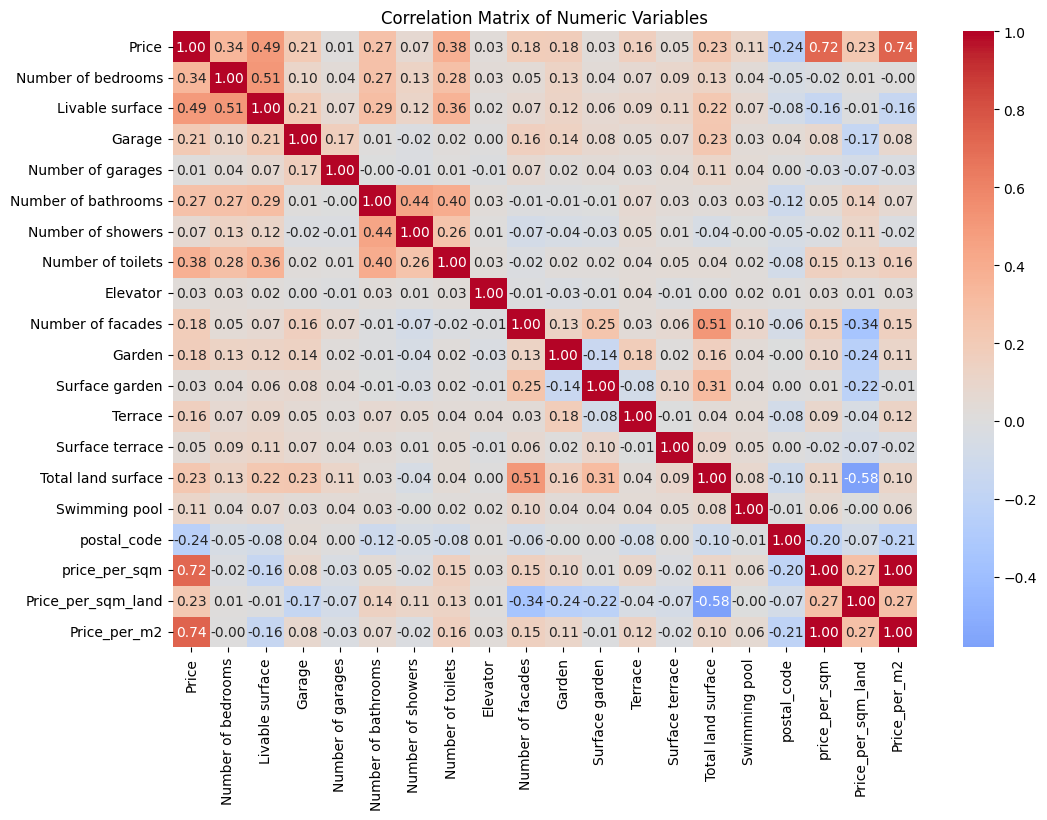

In [690]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df8.select_dtypes(include='number').columns

# Compute correlation matrix
corr_matrix = df8[numeric_cols].corr()

# Correlation of all variables with Price
price_corr = corr_matrix['Price'].sort_values(ascending=False)
print("Correlation with Price:")
print(price_corr)

# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Numeric Variables")
plt.show()



How are the variables themselves correlated to each other? Can you find groups of variables that are correlated together?
We can use the correlation matrix (already computed) and a cluster map to visualize clusters of correlated variables.

Which five variables do you consider the most important and why?

In [691]:
# --- Compute correlation of numeric variables ---
numeric_cols = df8.select_dtypes(include="number").columns
price_corr = df8[numeric_cols].corr()["Price"]

# --- Drop Price itself ---
price_corr = price_corr.drop("Price")

# --- Sort by absolute correlation and take top 10 ---
top10_vars = price_corr.abs().sort_values(ascending=False).head(10)

print("Top 10 numeric variables most correlated with Price:")
print(top10_vars)


Top 10 numeric variables most correlated with Price:
Price_per_m2           0.739773
price_per_sqm          0.718874
Livable surface        0.494399
Number of toilets      0.377059
Number of bedrooms     0.338050
Number of bathrooms    0.268844
postal_code            0.237465
Total land surface     0.232173
Price_per_sqm_land     0.225864
Garage                 0.207147
Name: Price, dtype: float64


In [692]:
df8.columns

Index(['Property ID', 'Price', 'State of the property', 'Number of bedrooms',
       'Livable surface', 'Garage', 'Number of garages', 'Number of bathrooms',
       'Number of showers', 'Number of toilets', 'Type of heating',
       'Type of glazing', 'Elevator', 'Number of facades', 'Garden',
       'Surface garden', 'Terrace', 'Surface terrace', 'Total land surface',
       'Swimming pool', 'type', 'postal_code', 'city', 'Region', 'province',
       'price_per_sqm', 'Price_per_sqm_land', 'is_extreme', 'Price_per_m2'],
      dtype='object')

yeni top 5

In [693]:
import plotly.express as px
import pandas as pd

# Select numeric columns
numeric_cols = df8.select_dtypes(include='number').columns

# Compute correlation matrix
corr_matrix = df8[numeric_cols].corr()

# Correlation of all variables with Price
price_corr = corr_matrix['Price'].drop('Price')  # exclude Price itself

# Top 10 variables by absolute correlation
top10 = price_corr.abs().sort_values(ascending=False).head(10)
top10_df = price_corr[top10.index].reset_index()
top10_df.columns = ['Variable', 'Correlation with Price']

# --- Exclude some variables ---
exclude_cols = ['Price_per_sqm_land', 'price_per_sqm', 'postal_code']  # example columns to exclude
top10_df = top10_df[~top10_df['Variable'].isin(exclude_cols)]

# Bar chart
fig = px.bar(
    top10_df,
    x='Variable',
    y='Correlation with Price',
    text='Correlation with Price',
    title='Top Variables Most Correlated with Price (Filtered)',
    labels={'Correlation with Price': 'Correlation with Price'},
    color='Correlation with Price',
    color_continuous_scale='Viridis'
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(template='plotly_white', yaxis=dict(range=[0, 1]), height=600)

fig.show()


How are the number of properties distributed according to their surface?

In [694]:
import plotly.express as px
import pandas as pd

# Clean the columns: convert to numeric
surface_cols = ['Livable surface', 'Total land surface', 'Surface garden', 'Price', 'price_per_sqm']
for col in surface_cols:
    df8[col] = pd.to_numeric(df8[col], errors='coerce')

# Create individual histograms
for col in surface_cols:
    fig = px.histogram(
        df8,
        x=col,
        nbins=50,
        title=f"Distribution of {col}",
        labels={col: f"{col} (m²)"},
        marginal="box"  # optional: adds box plot above
    )
    fig.update_layout(template="plotly_white", height=500)
    fig.show()



Histogram of Prices and Price per m²

Boxplot: Price by Province

In [695]:
import plotly.express as px
import pandas as pd

# Province'leri median fiyata göre sırala (yüksek → düşük)
province_order = (
    df8.groupby("province")["Price"]
       .median()
       .sort_values(ascending=False)
       .index.tolist()
)

# Box plot (province sırası DESCENDING olarak uygulanıyor)
fig3 = px.box(
    df8,
    x="province",
    y="Price",
    points="all",
    title="House Price Distribution by Province (Descending)",
    labels={"Price": "Price (€)", "province": "Province"},
    category_orders={"province": province_order}
)

fig3.update_layout(
    template="plotly_white",
    xaxis_tickangle=45,
    height=600
)

fig3.show()



Top 10 Most Expensive Cities

In [696]:
import plotly.express as px

# City başına ilan sayısı ve median Price
city_stats = df8.groupby("city").agg(
    median_price=("Price", "median"),
    count=("Price", "size")
).reset_index()

# Filtre: en az 30 ilan olan şehirler
city_stats = city_stats[city_stats["count"] >= 10]

# Top 10 median Price
top10 = city_stats.sort_values("median_price", ascending=False).head(10)

# Bar chart
fig4 = px.bar(
    top10,
    x="city",
    y="median_price",
    text="median_price",
    title="Top 10 Most Expensive Cities (Median Price, ≥10 listings)",
    labels={"median_price": "Median Price (€)"},
    color="median_price",
    color_continuous_scale="Turbo"
)

fig4.update_traces(texttemplate="€%{text:,.0f}", textposition="outside")
fig4.update_layout(template="plotly_white", xaxis_tickangle=45, height=600)
fig4.show()



In [697]:
import plotly.graph_objects as go
import pandas as pd

# City başına median Price
city_stats = df8.groupby(["province", "city"]).agg(
    median_price=("Price", "median"),
    count=("Price", "size")
).reset_index()

# Filtre: en az 10 ilan olan şehirler
city_stats = city_stats[city_stats["count"] >= 10]

# Her province için en pahalı 3 city
top3_cities = city_stats.sort_values(["province", "median_price"], ascending=[True, False]).groupby("province").head(3)

# Province sırasını top city price ortalamasına göre ayarlayalım
province_order = top3_cities.groupby("province")["median_price"].mean().sort_values(ascending=False).index

# Tek bar plot, her bar province, 3 city stack
fig = go.Figure()

for province in province_order:
    cities = top3_cities[top3_cities["province"] == province]
    fig.add_trace(go.Bar(
        x=[province]*len(cities),
        y=cities["median_price"],
        text=cities["city"],
        hovertext=cities["city"],
        name=None,  # city isimlerini hoverda gösteriyoruz
        marker_color=cities["median_price"]
    ))

fig.update_layout(
    title="Top 3 Most Expensive Cities per Province (Median Price)",
    xaxis_title="Province",
    yaxis_title="Median Price (€)",
    barmode="stack",  # her province barı 3 city için stack
    template="plotly_white",
    xaxis_tickangle=45,
    height=600,
    showlegend=False
)

fig.show()


Scatter: Price vs Livable Surface

In [698]:
fig5 = px.scatter(df8, x="Livable surface", y="Price", color="Number of bedrooms", size="Total land surface",
                  hover_data=["city", "province"], title="Price vs Livable Surface by Number of Bedrooms")
fig5.update_layout(template="plotly_white", yaxis_title="Price (€)", xaxis_title="Livable Surface (m²)")
fig5.show()


Impact of Additional Features (Garage, Garden, Terrace, Elevator, Swimming Pool)

In [699]:
features = ["Garage", "Garden", "Terrace", "Elevator", "Swimming pool"]
feature_prices = []

for f in features:
    avg_yes = df8[df8[f] == 1]["Price"].mean()
    avg_no = df8[df8[f] == 0]["Price"].mean()
    feature_prices.append({"Feature": f, "Yes": avg_yes, "No": avg_no})

feature_df = pd.DataFrame(feature_prices)
feature_df_melt = feature_df.melt(id_vars="Feature", value_vars=["Yes","No"], var_name="Has Feature", value_name="Avg Price")

fig7 = px.bar(feature_df_melt, x="Feature", y="Avg Price", color="Has Feature", barmode="group", text="Avg Price",
              title="Impact of Features on House Price", labels={"Avg Price": "Average Price (€)"})
fig7.update_traces(texttemplate="€%{text:,.0f}", textposition="outside")
fig7.update_layout(template="plotly_white", height=500)
fig7.show()


Extreme

In [700]:
import plotly.express as px

# --- Scatter plot of extreme houses ---
fig_extreme = px.scatter(
    df_extreme,
    x="city",
    y="Price",
    color="province",
    size="Livable surface",
    hover_data=["city", "province", "Number of bedrooms", "Total land surface"],
    title=f"Extreme Properties (Very Expensive Houses)",
)

fig_extreme.update_layout(
    template="plotly_white",
    xaxis_title="City",
    yaxis_title="Price (€)",
    xaxis_tickangle=45,
    height=600
)

fig_extreme.show()
